## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = '/Users/arpanganguli/Documents/Professional/Analysis/ISLR/Datasets/OJ.csv'
OJ = pd.read_csv(url, index_col='SlNo')
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
SlNo,,,,,,,,,,,,,,,,,,
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [4]:
OJ.Purchase = pd.factorize(OJ.Purchase)[0]
OJ.Store7 = pd.factorize(OJ.Store7)[0]
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
SlNo,,,,,,,,,,,,,,,,,,
1,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
2,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
3,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
4,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
5,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [5]:
OJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
Purchase          1070 non-null int64
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null int64
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(7)
memory usage: 158.8 KB


***

## 8.a. Splitting the data set into training and test data set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = OJ.drop(columns='Purchase')
y = OJ.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.53271028037, random_state=42)

In [8]:
X_train.shape

(500, 17)

In [9]:
y_train.shape

(500,)

***

## 8.b. Support vector classifier with $cost$=0.01 with $Purchase$ as the response variable and the other variables as predictors

In [10]:
from sklearn.svm import SVC

In [11]:
svmfit = SVC(kernel='linear', C=0.01).fit(X_train, y_train)

In [12]:
svmfit.support_vectors_

array([[2.31e+02, 7.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 0.00e+00],
       [2.34e+02, 1.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 1.00e+00],
       [2.34e+02, 2.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 2.00e+00],
       ...,
       [2.28e+02, 2.00e+00, 1.69e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [2.75e+02, 7.00e+00, 1.99e+00, ..., 0.00e+00, 1.40e-01, 0.00e+00],
       [2.62e+02, 1.00e+00, 1.76e+00, ..., 0.00e+00, 2.30e-01, 1.00e+00]])

In [13]:
svmfit.classes_

array([0, 1])

In [14]:
svmfit.coef_

array([[-0.00777627, -0.22031244,  0.0222713 , -0.06014292, -0.00800719,
         0.1385792 , -0.07922806,  0.15458802, -0.69092423, -0.19872211,
         0.03027849, -0.2290006 , -0.01551612,  0.06389155, -0.00449543,
        -0.08241421, -0.11169958]])

In [15]:
svmfit.get_params()

{'C': 0.01,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

***

## 8.c. Calculating training and test error rates

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
svmpred_train = svmfit.predict(X_train)

In [18]:
conf_mat_train = pd.DataFrame(confusion_matrix(y_train, svmpred_train).T, index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_train

,0,1
0,251,96
1,47,106


In [19]:
class_mat_train  = classification_report(y_train, svmpred_train)
print(class_mat_train)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       298
           1       0.69      0.52      0.60       202

   micro avg       0.71      0.71      0.71       500
   macro avg       0.71      0.68      0.69       500
weighted avg       0.71      0.71      0.71       500



In [20]:
svmpred_test = svmfit.predict(X_test)

In [30]:
conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svmpred_test).T, index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_test

,0,1
0,293,111
1,62,104


In [22]:
class_mat_test  = classification_report(y_test, svmpred_test)
print(class_mat_test)

              precision    recall  f1-score   support

           0       0.73      0.83      0.77       355
           1       0.63      0.48      0.55       215

   micro avg       0.70      0.70      0.70       570
   macro avg       0.68      0.65      0.66       570
weighted avg       0.69      0.70      0.69       570



***

## 8.d. Finding the optimal $cost$

In [52]:
cost_range = np.linspace(0.01, 10, 50)

In [68]:
errdf = pd.DataFrame()
for k in cost_range:
    svmfit = SVC(kernel='linear', C=k, degree=1).fit(X_train, y_train)
    svmpred_train = svmfit.predict(X_train)
    conf_mat_train = confusion_matrix(y_train, svmpred_train)
    NoNo = pd.DataFrame([conf_mat_train[0][0]])
    YesYes = pd.DataFrame([conf_mat_train[1][1]])
    errdf = errdf.append((NoNo + YesYes) / 500)

errdf.columns = ['error']
errdf.reset_index(drop=True, inplace=True)
errdf.index = np.round(cost_range, 2)
errdf

,error
0.01,0.714
0.21,0.850
0.42,0.854
0.62,0.854
0.83,0.852
1.03,0.850
1.23,0.848
1.44,0.850
1.64,0.848
1.84,0.852


Text(0,0.5,'error')

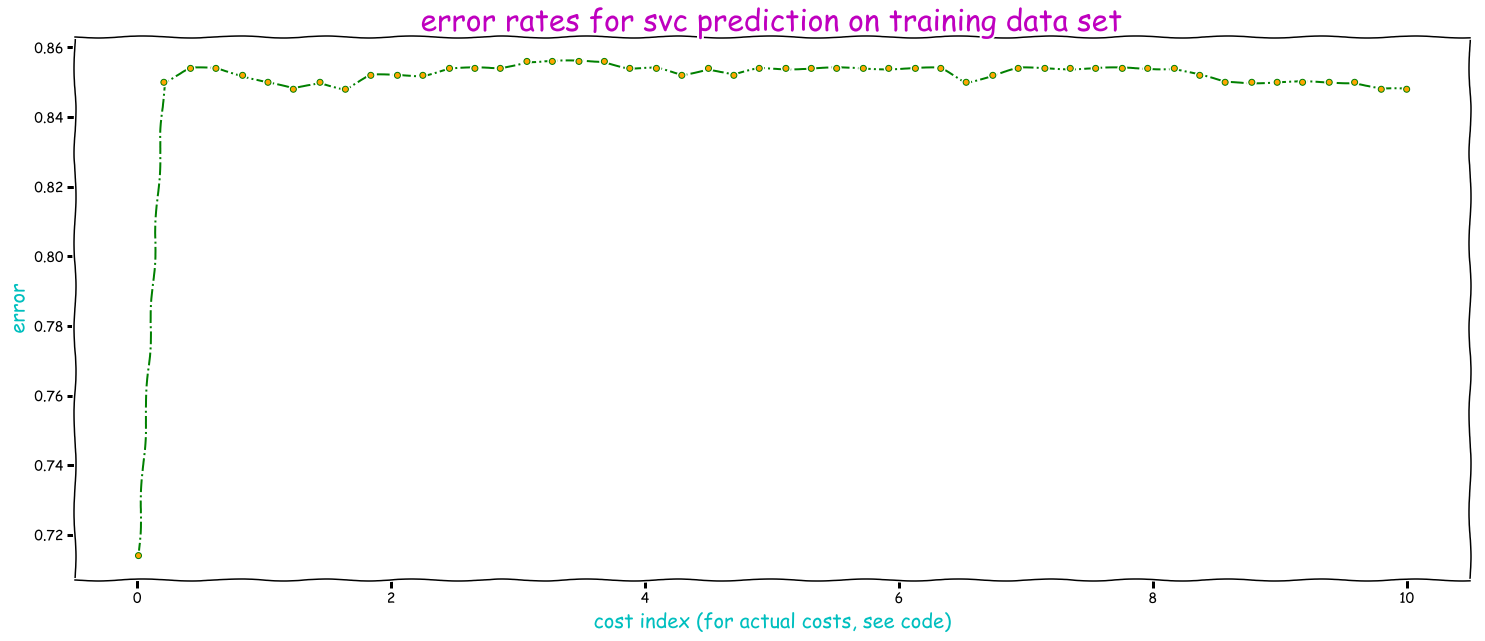

In [69]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(errdf.index, errdf.error, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('error rates for svc prediction on training data set', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('error', fontsize=20, color='c')

In [70]:
errdf = pd.DataFrame()
for k in cost_range:
    svmfit = SVC(kernel='linear', C=k, degree=1).fit(X_train, y_train)
    svmpred_test = svmfit.predict(X_test)
    conf_mat_test = confusion_matrix(y_test, svmpred_test)
    NoNo = pd.DataFrame([conf_mat_test[0][0]])
    YesYes = pd.DataFrame([conf_mat_test[1][1]])
    errdf = errdf.append((NoNo + YesYes) / 500)

errdf.columns = ['error']
errdf.reset_index(drop=True, inplace=True)
errdf.index = np.round(cost_range, 2)
errdf

,error
0.01,0.794
0.21,0.926
0.42,0.918
0.62,0.920
0.83,0.922
1.03,0.924
1.23,0.926
1.44,0.926
1.64,0.926
1.84,0.926


Text(0,0.5,'error')

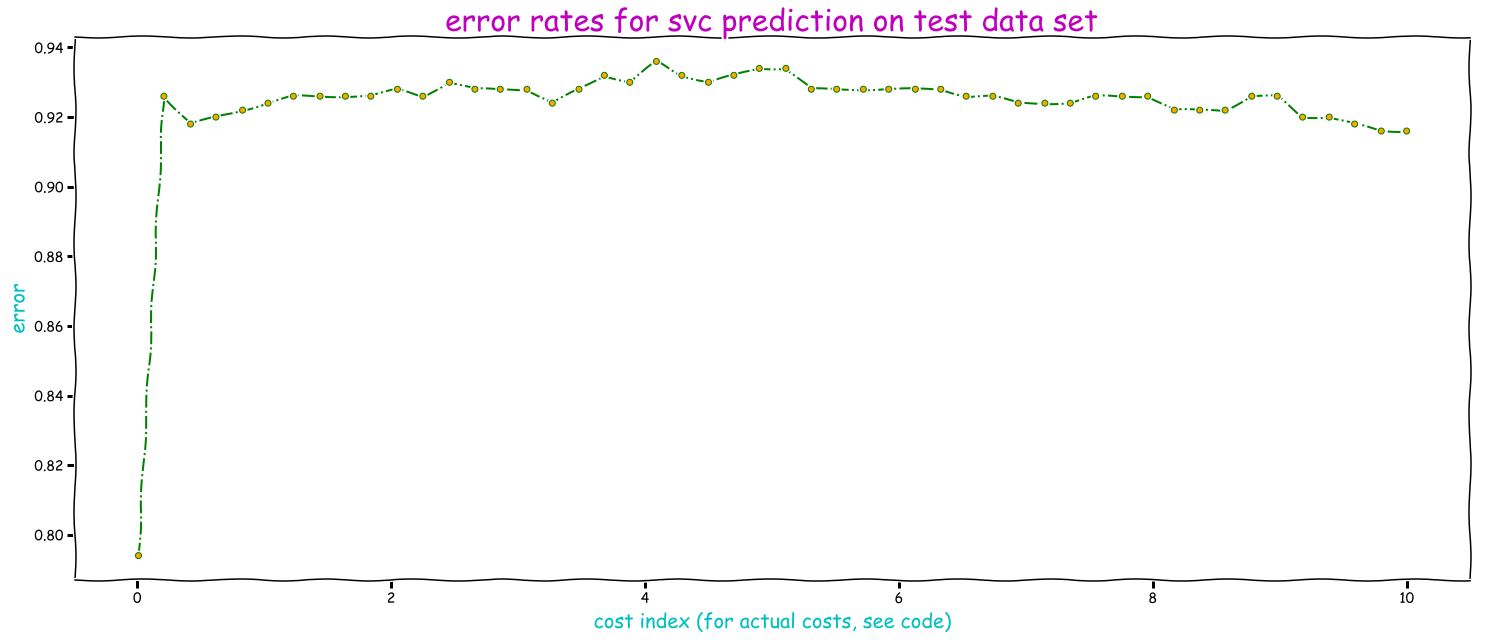

In [71]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(errdf.index, errdf.error, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('error rates for svc prediction on test data set', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('error', fontsize=20, color='c')

**Both training and test data sets provide least error for $cost$=0.01.**

***

## 8.e. Training and test data sets for $cost$=0.01

In [72]:
svmpred001_train = svmfit.predict(X_train)
svmpred001_test = svmfit.predict(X_test)

In [75]:
conf_mat_train = pd.DataFrame(confusion_matrix(y_train, svmpred_train), index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svmpred_test), index=svmfit.classes_, columns=svmfit.classes_)

In [76]:
conf_mat_train

,0,1
0,258,40
1,36,166


In [79]:
class_mat_train = classification_report(y_train, svmpred_train)
print(class_mat_train)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       298
           1       0.81      0.82      0.81       202

   micro avg       0.85      0.85      0.85       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.85      0.85      0.85       500



In [77]:
conf_mat_test

,0,1
0,297,58
1,54,161


In [80]:
class_mat_test = classification_report(y_test, svmpred_test)
print(class_mat_test)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       355
           1       0.74      0.75      0.74       215

   micro avg       0.80      0.80      0.80       570
   macro avg       0.79      0.79      0.79       570
weighted avg       0.80      0.80      0.80       570



***

## 8.f. Support vector machine with a radial kernel

In [106]:
svmfit = SVC(kernel='rbf', C=0.01, degree=3, gamma=0.01).fit(X_train, y_train)

In [107]:
svmfit.support_vectors_

array([[2.78e+02, 7.00e+00, 2.06e+00, ..., 0.00e+00, 7.00e-02, 0.00e+00],
       [2.31e+02, 7.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 0.00e+00],
       [2.34e+02, 1.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 1.00e+00],
       ...,
       [2.28e+02, 2.00e+00, 1.69e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [2.75e+02, 7.00e+00, 1.99e+00, ..., 0.00e+00, 1.40e-01, 0.00e+00],
       [2.62e+02, 1.00e+00, 1.76e+00, ..., 0.00e+00, 2.30e-01, 1.00e+00]])

In [108]:
svmfit.classes_

array([0, 1])

In [109]:
svmfit.get_params()

{'C': 0.01,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [110]:
svmpred_train = svmfit.predict(X_train)

In [111]:
conf_mat_train = pd.DataFrame(confusion_matrix(y_train, svmpred_train).T, index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_train

,0,1
0,298,202
1,0,0


In [116]:
import warnings
warnings.filterwarnings('ignore')

class_mat_train  = classification_report(y_train, svmpred_train)
print(class_mat_train)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       298
           1       0.00      0.00      0.00       202

   micro avg       0.60      0.60      0.60       500
   macro avg       0.30      0.50      0.37       500
weighted avg       0.36      0.60      0.45       500



In [117]:
svmpred_test = svmfit.predict(X_test)

In [118]:
conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svmpred_test).T, index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_test

,0,1
0,355,215
1,0,0


In [119]:
class_mat_test  = classification_report(y_test, svmpred_test)
print(class_mat_test)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       355
           1       0.00      0.00      0.00       215

   micro avg       0.62      0.62      0.62       570
   macro avg       0.31      0.50      0.38       570
weighted avg       0.39      0.62      0.48       570



In [121]:
cost_range = np.linspace(0.01, 10, 50)
gamma = np.linspace(0.1, 0.5, 5)

In [125]:
errdf = pd.DataFrame()
for k in cost_range:
    for j in gamma:
        svmfit = SVC(kernel='rbf', C=k, degree=3).fit(X_train, y_train)
        svmpred_train = svmfit.predict(X_train)
        conf_mat_train = confusion_matrix(y_train, svmpred_train)
        NoNo = pd.DataFrame([conf_mat_train[0][0]])
        YesYes = pd.DataFrame([conf_mat_train[1][1]])
        errdf = errdf.append((NoNo + YesYes) / 500)

errdf.columns = ['error']
errdf.reset_index(drop=True, inplace=True)
errdf

,error
0,0.596
1,0.596
2,0.596
3,0.596
4,0.596
5,0.708
6,0.708
7,0.708
8,0.708
9,0.708


Text(0,0.5,'error')

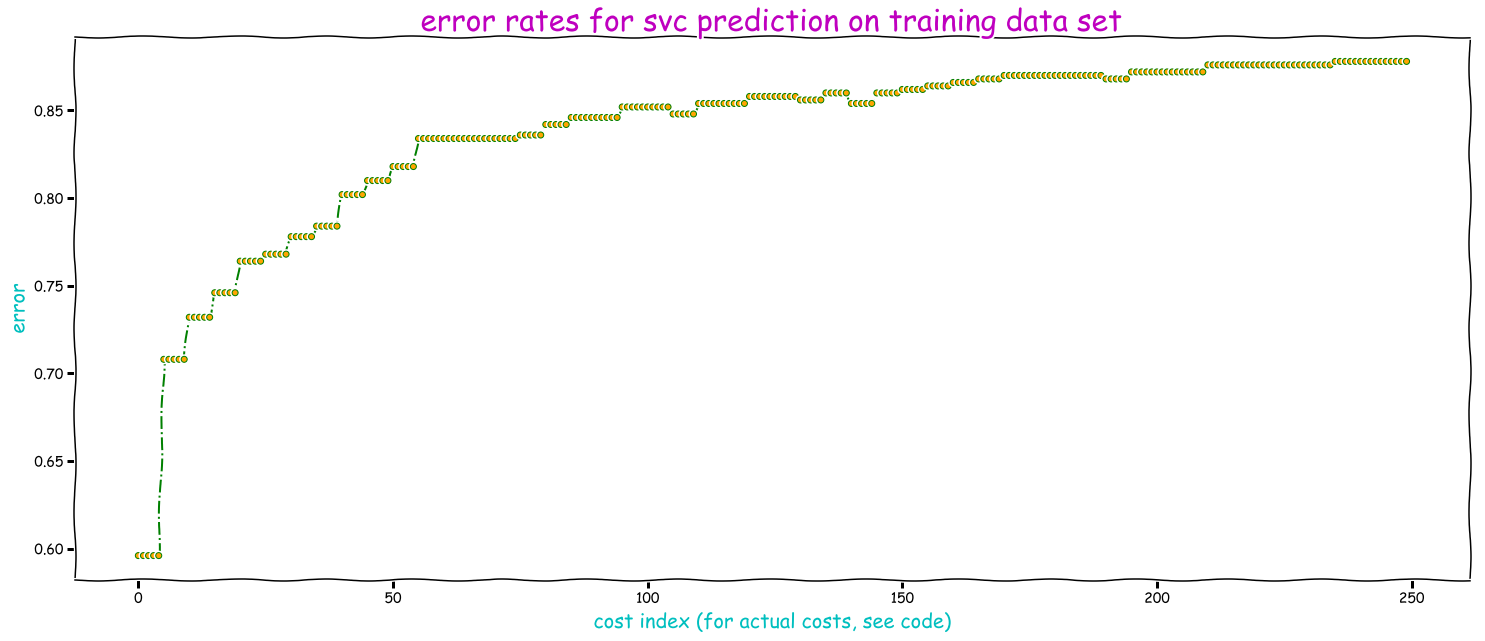

In [126]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(errdf.index, errdf.error, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('error rates for svc prediction on training data set', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('error', fontsize=20, color='c')

In [127]:
errdf = pd.DataFrame()
for k in cost_range:
    svmfit = SVC(kernel='rbf', C=k, degree=3).fit(X_train, y_train)
    svmpred_test = svmfit.predict(X_test)
    conf_mat_test = confusion_matrix(y_test, svmpred_test)
    NoNo = pd.DataFrame([conf_mat_test[0][0]])
    YesYes = pd.DataFrame([conf_mat_test[1][1]])
    errdf = errdf.append((NoNo + YesYes) / 500)

errdf.columns = ['error']
errdf.reset_index(drop=True, inplace=True)
errdf.index = np.round(cost_range, 2)
errdf

,error
0.01,0.710
0.21,0.732
0.42,0.750
0.62,0.772
0.83,0.790
1.03,0.772
1.23,0.774
1.44,0.774
1.64,0.782
1.84,0.784


Text(0,0.5,'error')

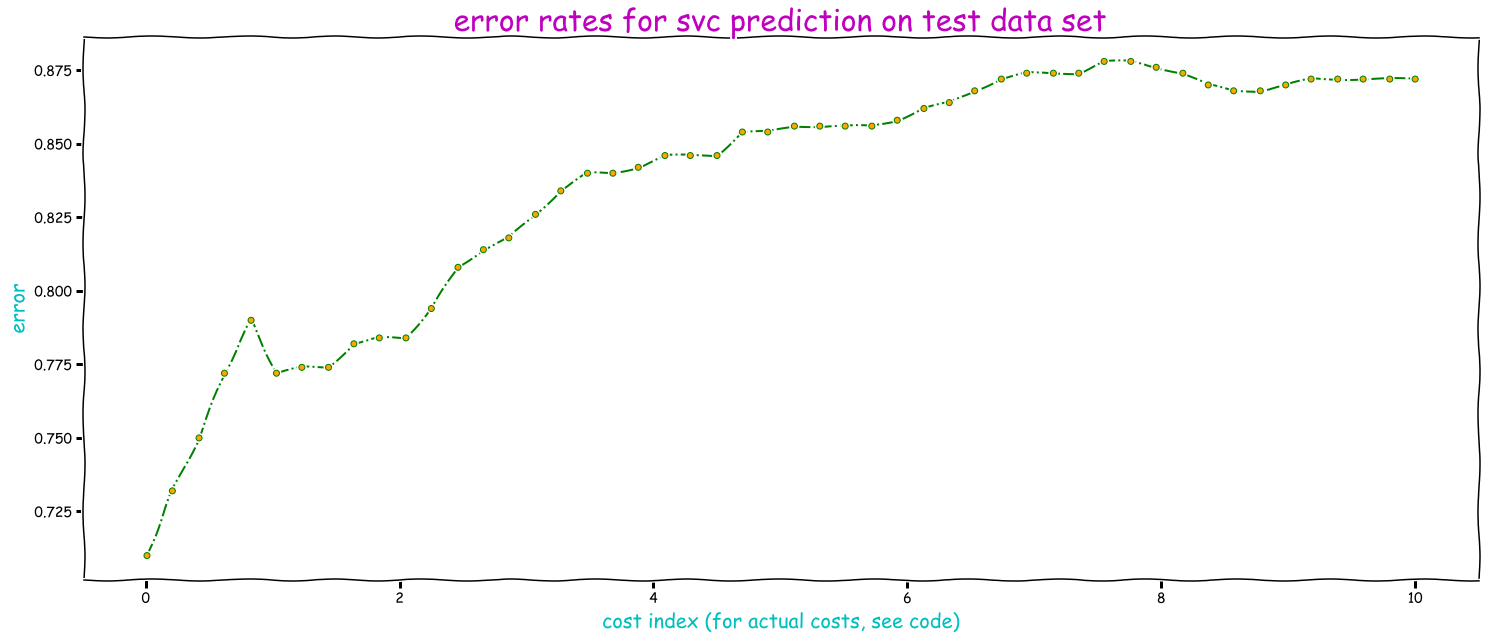

In [128]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(errdf.index, errdf.error, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('error rates for svc prediction on test data set', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('error', fontsize=20, color='c')

**Both training and test data sets provide least error for $cost$=0.01.**

***

In [129]:
svmfit = SVC(kernel='rbf', C=0.01, degree=2, gamma=0.01).fit(X_train, y_train)

In [130]:
svmfit.support_vectors_

array([[2.78e+02, 7.00e+00, 2.06e+00, ..., 0.00e+00, 7.00e-02, 0.00e+00],
       [2.31e+02, 7.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 0.00e+00],
       [2.34e+02, 1.00e+00, 1.69e+00, ..., 0.00e+00, 3.00e-01, 1.00e+00],
       ...,
       [2.28e+02, 2.00e+00, 1.69e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [2.75e+02, 7.00e+00, 1.99e+00, ..., 0.00e+00, 1.40e-01, 0.00e+00],
       [2.62e+02, 1.00e+00, 1.76e+00, ..., 0.00e+00, 2.30e-01, 1.00e+00]])

In [131]:
svmfit.classes_

array([0, 1])

In [132]:
svmfit.get_params()

{'C': 0.01,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [133]:
svmpred_train = svmfit.predict(X_train)

In [134]:
conf_mat_train = pd.DataFrame(confusion_matrix(y_train, svmpred_train).T, index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_train

,0,1
0,298,202
1,0,0


In [135]:
import warnings
warnings.filterwarnings('ignore')

class_mat_train  = classification_report(y_train, svmpred_train)
print(class_mat_train)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       298
           1       0.00      0.00      0.00       202

   micro avg       0.60      0.60      0.60       500
   macro avg       0.30      0.50      0.37       500
weighted avg       0.36      0.60      0.45       500



In [136]:
svmpred_test = svmfit.predict(X_test)

In [137]:
conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svmpred_test).T, index=svmfit.classes_, columns=svmfit.classes_)
conf_mat_test

,0,1
0,355,215
1,0,0


In [138]:
class_mat_test  = classification_report(y_test, svmpred_test)
print(class_mat_test)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       355
           1       0.00      0.00      0.00       215

   micro avg       0.62      0.62      0.62       570
   macro avg       0.31      0.50      0.38       570
weighted avg       0.39      0.62      0.48       570



In [139]:
cost_range = np.linspace(0.01, 10, 50)
gamma = np.linspace(0.1, 0.5, 5)

In [140]:
errdf = pd.DataFrame()
for k in cost_range:
    for j in gamma:
        svmfit = SVC(kernel='rbf', C=k, degree=2).fit(X_train, y_train)
        svmpred_train = svmfit.predict(X_train)
        conf_mat_train = confusion_matrix(y_train, svmpred_train)
        NoNo = pd.DataFrame([conf_mat_train[0][0]])
        YesYes = pd.DataFrame([conf_mat_train[1][1]])
        errdf = errdf.append((NoNo + YesYes) / 500)

errdf.columns = ['error']
errdf.reset_index(drop=True, inplace=True)
errdf

,error
0,0.596
1,0.596
2,0.596
3,0.596
4,0.596
5,0.708
6,0.708
7,0.708
8,0.708
9,0.708


Text(0,0.5,'error')

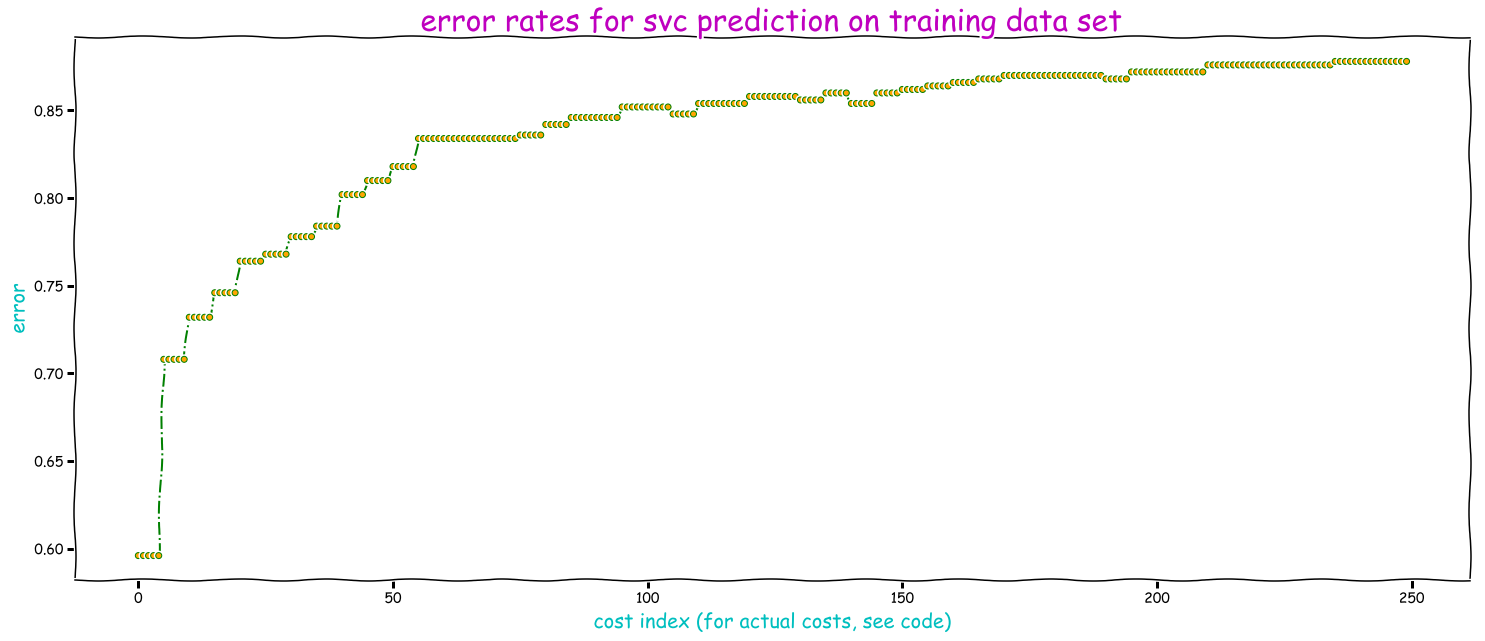

In [141]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(errdf.index, errdf.error, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('error rates for svc prediction on training data set', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('error', fontsize=20, color='c')

In [142]:
errdf = pd.DataFrame()
for k in cost_range:
    svmfit = SVC(kernel='rbf', C=k, degree=2).fit(X_train, y_train)
    svmpred_test = svmfit.predict(X_test)
    conf_mat_test = confusion_matrix(y_test, svmpred_test)
    NoNo = pd.DataFrame([conf_mat_test[0][0]])
    YesYes = pd.DataFrame([conf_mat_test[1][1]])
    errdf = errdf.append((NoNo + YesYes) / 500)

errdf.columns = ['error']
errdf.reset_index(drop=True, inplace=True)
errdf.index = np.round(cost_range, 2)
errdf

,error
0.01,0.710
0.21,0.732
0.42,0.750
0.62,0.772
0.83,0.790
1.03,0.772
1.23,0.774
1.44,0.774
1.64,0.782
1.84,0.784


Text(0,0.5,'error')

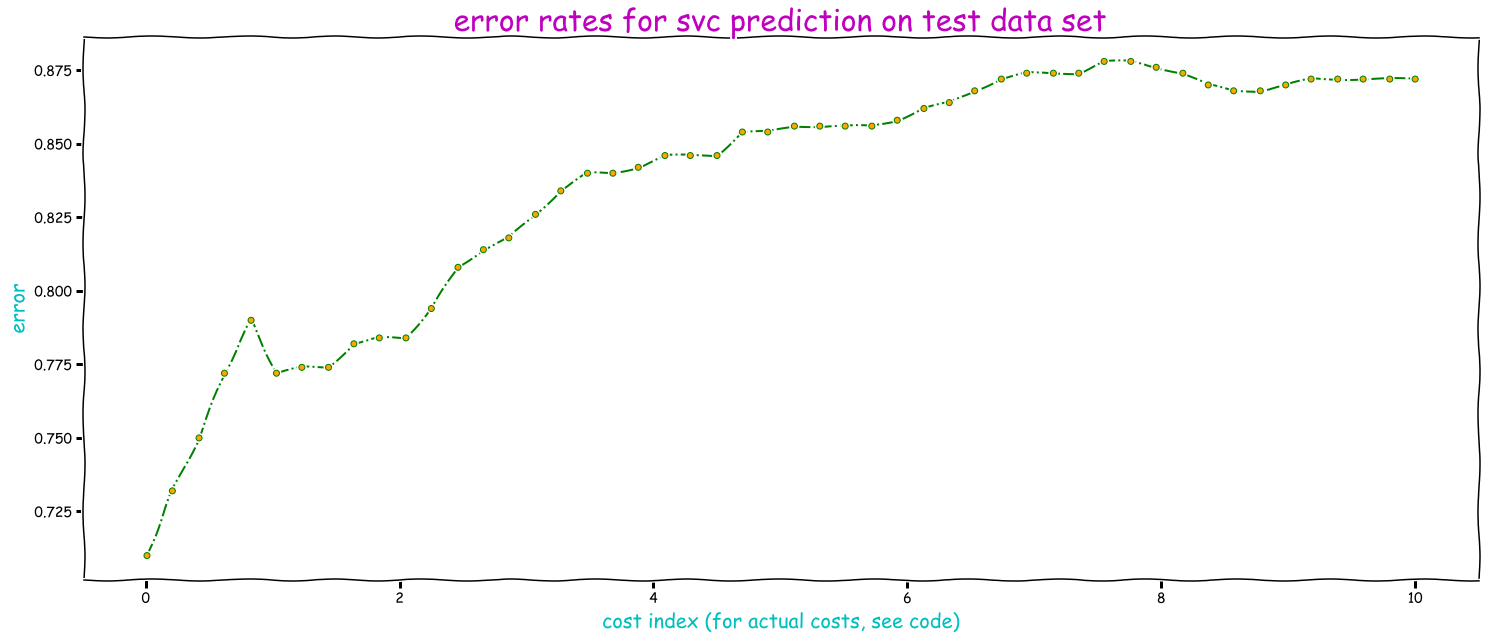

In [143]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(errdf.index, errdf.error, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('error rates for svc prediction on test data set', fontsize=30, color='m')
plt.xlabel('cost index (for actual costs, see code)', fontsize=20, color='c')
plt.ylabel('error', fontsize=20, color='c')

**Both training and test data sets provide least error for $cost$=0.01.**

***

## 8.h. Finding the best approach

**Overall, radial kernel seems to provide least error on both training and test data set.**